# Data Analysis Of Wine Reviews 
By Tanushree Shetty

In [1]:
#Import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Read Data

In [2]:
# Read the json file to pandas dataframe
reviews = pd.read_json("winemag-data-130k-v2.json")

In [3]:
reviews.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


## Data Cleaning

In [4]:
reviews.shape

(129971, 13)

In [5]:
reviews.isna().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

In [6]:
reviews=reviews.drop(['taster_name', 'taster_twitter_handle','region_2','designation'], axis = 1)
#region_2 has 60% na and designation has 30% na
#The rest are insignificant for our analysis
#The other columns and insignificant for our analysis

In [7]:
reviews.set_index("title")

,points,description,price,variety,region_1,province,country,winery
title,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),87,"Aromas include tropical fruit, broom, brimston...",NaN,White Blend,Etna,Sicily & Sardinia,Italy,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),87,"This is ripe and fruity, a wine that is smooth...",15.0,Portuguese Red,None,Douro,Portugal,Quinta dos Avidagos
Rainstorm 2013 Pinot Gris (Willamette Valley),87,"Tart and snappy, the flavors of lime flesh and...",14.0,Pinot Gris,Willamette Valley,Oregon,US,Rainstorm
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),87,"Pineapple rind, lemon pith and orange blossom ...",13.0,Riesling,Lake Michigan Shore,Michigan,US,St. Julian
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),87,"Much like the regular bottling from 2012, this...",65.0,Pinot Noir,Willamette Valley,Oregon,US,Sweet Cheeks
...,...,...,...,...,...,...,...,...
Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),90,Notes of honeysuckle and cantaloupe sweeten th...,28.0,Riesling,None,Mosel,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
Citation 2004 Pinot Noir (Oregon),90,Citation is given as much as a decade of bottl...,75.0,Pinot Noir,Oregon,Oregon,US,Citation
Domaine Gresser 2013 Kritt Gewurztraminer (Alsace),90,Well-drained gravel soil gives this wine its c...,30.0,Gewürztraminer,Alsace,Alsace,France,Domaine Gresser


In [8]:
#Replace NAs of columns with relevant data
replace_na = {"price": 0.0,"variety": "Unknown", "province": "Unknown", "country":"Unknown" }  
reviews = reviews.fillna(replace_na)

In [9]:
#Since price is an important column in out analysis, we remove values that are 0 so that it does not affect
#the analysis
reviews.drop(reviews[reviews['price']==0.0].index, axis=0, inplace=True)

In [10]:
reviews

,points,title,description,price,variety,region_1,province,country,winery
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",15.0,Portuguese Red,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",14.0,Pinot Gris,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",13.0,Riesling,Lake Michigan Shore,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",65.0,Pinot Noir,Willamette Valley,Oregon,US,Sweet Cheeks
5,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,15.0,Tempranillo-Merlot,Navarra,Northern Spain,Spain,Tandem
...,...,...,...,...,...,...,...,...,...
129966,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,28.0,Riesling,None,Mosel,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,75.0,Pinot Noir,Oregon,Oregon,US,Citation
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,30.0,Gewürztraminer,Alsace,Alsace,France,Domaine Gresser
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",32.0,Pinot Gris,Alsace,Alsace,France,Domaine Marcel Deiss


In [11]:
reviews.shape

(120975, 9)

## Data Exploration

#### Province Column

In [12]:
reviews.province.value_counts().head(25)


California            36104
Washington             8583
Oregon                 5359
Tuscany                5128
Bordeaux               4002
Northern Spain         3797
Mendoza Province       3226
Burgundy               3106
Piedmont               3089
New York               2676
Veneto                 2315
Alsace                 2147
Northeastern Italy     1986
Loire Valley           1598
Sicily & Sardinia      1559
Champagne              1383
Southwest France       1335
South Australia        1331
Catalonia              1153
Provence               1139
Douro                  1134
Southern Italy         1131
Central Italy          1100
Rhône Valley           1042
Mosel                  1023
Name: province, dtype: int64

In [13]:
reviews.province.value_counts().head()/len(reviews)*100

California    29.844183
Washington     7.094854
Oregon         4.429841
Tuscany        4.238892
Bordeaux       3.308122
Name: province, dtype: float64

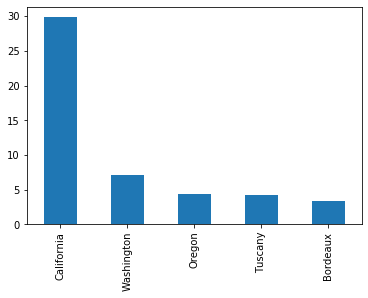

In [14]:
(reviews.province.value_counts().head()/len(reviews)*100).plot.bar()

#### Variety of wine column

In [15]:
(reviews.variety.value_counts()/len(reviews)*100).head()

Pinot Noir                  10.569952
Chardonnay                   9.158917
Cabernet Sauvignon           7.758628
Red Blend                    7.006406
Bordeaux-style Red Blend     4.414135
Name: variety, dtype: float64

#### Country Column

In [16]:
(reviews.country.value_counts()/len(reviews)*100).head()

US          44.856375
France      14.693945
Italy       13.981401
Spain        5.433354
Portugal     4.029758
Name: country, dtype: float64

#### Price Column

In [17]:
reviews.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

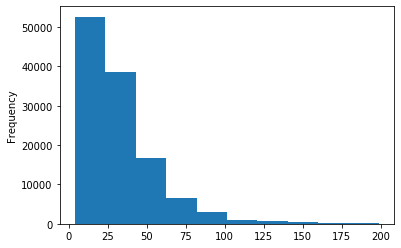

In [18]:
reviews[reviews.price < 200]['price'].plot.hist()

#### Points column

In [19]:
reviews.points.describe()

count    120975.000000
mean         88.421881
std           3.044508
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

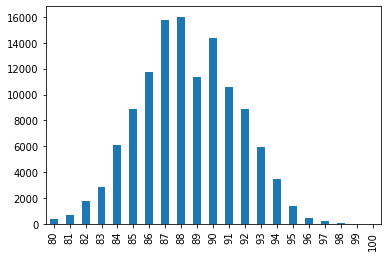

In [20]:
reviews.points.value_counts().sort_index().plot.bar()

#### Price vs Points Scatter Plot

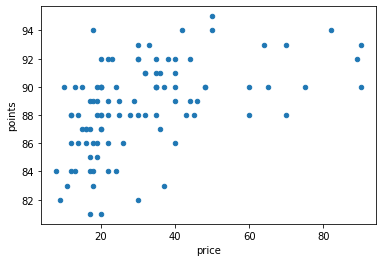

In [21]:
reviews[reviews.price<100].sample(100).plot.scatter(x='price',y='points')  #I had to sample 100 values because there's too much 
# overlapping data

## Data Analysis

### The prices summary according to each Country

In [22]:
df_price = reviews.groupby('country')['price'].agg({'Average_Price':'mean', 'Minimum':'min', 'Maximum':'max'})
df_price.reset_index(inplace=True)

df_price

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,country,Average_Price,Minimum,Maximum
0,Argentina,24.510117,4.0,230.0
1,Armenia,14.500000,14.0,15.0
2,Australia,35.437663,5.0,850.0
3,Austria,30.762772,7.0,1100.0
4,Bosnia and Herzegovina,12.500000,12.0,13.0
5,Brazil,23.765957,10.0,60.0
6,Bulgaria,14.645390,8.0,100.0
7,Canada,35.712598,12.0,120.0
8,Chile,20.786458,5.0,400.0
9,China,18.000000,18.0,18.0


In [23]:
df_price.sort_values(by='Average_Price', ascending=False)

,country,Average_Price,Minimum,Maximum
37,Switzerland,85.285714,21.0,160.0
13,England,51.681159,25.0,95.0
16,Germany,42.257547,5.0,775.0
14,France,41.139120,5.0,3300.0
18,Hungary,40.648276,10.0,764.0
21,Italy,39.663770,5.0,900.0
39,US,36.573464,4.0,2013.0
7,Canada,35.712598,12.0,120.0
2,Australia,35.437663,5.0,850.0
20,Israel,31.768916,8.0,150.0


In [24]:
df_price.to_excel("PerCountryPrices.xlsx")

### The prices summary according to each Country

In [25]:
df_points = reviews.groupby('country')['points'].agg({'Average_Points':'mean', 'Minimum':'min', 'Maximum':'max'})
df_points.reset_index(inplace=True)

df_points

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,country,Average_Points,Minimum,Maximum
0,Argentina,86.710330,80,97
1,Armenia,87.500000,87,88
2,Australia,88.595466,80,100
3,Austria,90.190782,82,97
4,Bosnia and Herzegovina,86.500000,85,88
5,Brazil,84.659574,80,89
6,Bulgaria,87.936170,80,91
7,Canada,89.377953,82,94
8,Chile,86.495471,80,95
9,China,89.000000,89,89


In [26]:
df_points.sort_values(by='Average_Points', ascending=False)

,country,Average_Points,Minimum,Maximum
13,England,91.550725,89,95
19,India,90.222222,87,93
3,Austria,90.190782,82,97
16,Germany,89.836321,81,98
7,Canada,89.377953,82,94
18,Hungary,89.165517,81,97
9,China,89.000000,89,89
41,Unknown,88.745763,84,92
14,France,88.734867,80,100
23,Luxembourg,88.666667,88,90


In [27]:
df_points.to_excel("PerCountryPoints.xlsx")

### Percentage of wine counts for every country and province

In [28]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg(['size'])
countries_reviewed

size
country   province              
Argentina Mendoza Province  3226
          Other              530
Armenia   Armenia              2
Australia Australia Other    236
          New South Wales     85
...                          ...
Uruguay   Juanico             12
          Montevideo          11
          Progreso            11
          San Jose             3
          Uruguay             24

[423 rows x 1 columns]

In [29]:
countries_reviewed=countries_reviewed.reset_index()
countries_reviewed=countries_reviewed.sort_values(by='size', ascending=False)

In [30]:
total=len(reviews)

In [31]:
countries_reviewed["Percentage of wine counts"] = countries_reviewed["size"] / total * 100
countries_reviewed["Percentage of wine counts"]=round(countries_reviewed["Percentage of wine counts"], 2)

In [32]:
countries_reviewed

,country,province,size,Percentage of wine counts
389,US,California,36104,29.84
412,US,Washington,8583,7.09
406,US,Oregon,5359,4.43
226,Italy,Tuscany,5128,4.24
117,France,Bordeaux,4002,3.31
...,...,...,...,...
363,South Africa,Vlootenburg,1,0.00
311,Romania,Viile Timis,1,0.00
95,Croatia,Dalmatian Coast,1,0.00
58,Chile,Casablanca-Curicó Valley,1,0.00


In [33]:
countries_reviewed.to_excel("PerCountryWineCount.xlsx")